In [1]:
# Import dependencies
%matplotlib inline
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import statsmodels.api as sm
from scipy import stats
from sqlalchemy import create_engine
import getpass

In [2]:
# Enter password for connection string
password = getpass.getpass()

········


In [3]:
# Create connection string
conn_string = "postgresql://postgres:" + password + "@b-team-final-project.cct7ahzel1ur.us-west-2.rds.amazonaws.com:5432/B_Team_Final_Project"

In [4]:
# Create the connection
conn=create_engine(conn_string)

In [5]:
# Import health_outcomes table and drop "countyfips"
health_outcomes = pd.read_sql(
    'health_outcomes',
    conn
)
health_outcomes = health_outcomes.apply(pd.to_numeric)
health_outcomes = health_outcomes.drop("countyfips", axis=1)
health_outcomes

,arthritis,casthma,bphigh,cancer,highchol,kidney,copd,chd,depression,diabetes,obesity,teethlost,stroke
0,23.0,9.7,34.1,6.1,31.3,3.1,7.1,6.3,21.2,11.8,36.3,18.8,3.3
1,25.6,9.5,33.3,6.5,29.3,2.9,8.0,6.4,21.2,10.7,38.8,17.2,3.4
2,23.7,9.7,32.9,6.4,30.4,2.9,6.7,5.8,19.0,11.0,37.0,17.2,3.1
3,20.0,9.2,29.8,6.0,27.8,2.5,5.0,4.8,17.0,8.3,30.7,12.2,2.7
4,25.7,10.5,36.0,6.6,30.0,3.0,8.4,6.8,23.9,10.5,36.5,20.6,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116,34.1,11.0,41.0,7.0,33.6,3.3,11.8,8.3,28.4,13.1,42.1,27.7,4.2
3117,24.6,9.3,36.4,6.4,32.5,2.6,5.9,5.3,21.6,10.6,37.8,14.2,3.1
3118,19.4,9.6,27.0,6.1,27.1,2.5,5.7,5.1,15.8,9.8,29.8,15.3,2.7
3119,22.9,9.4,29.6,6.3,28.2,2.6,5.8,5.2,19.7,9.7,35.7,14.1,2.8


In [6]:
# Import prevention table and drop "countyfips"
prev_df =  pd.read_sql(
    'prevention',
    conn
)
prev_df = prev_df.apply(pd.to_numeric)
prev_df = prev_df.drop("countyfips", axis=1)
prev_df

,access,checkup,dental,bpmed,cholscreen,mammouse,cervical,colon_screen,corem,corew
0,24.2,74.1,61.1,57.9,83.8,71.5,83.0,58.7,25.2,23.7
1,18.9,73.4,57.8,56.8,83.0,68.7,82.2,61.2,24.7,20.6
2,20.5,72.6,59.3,56.8,82.1,69.0,82.6,58.4,24.4,22.3
3,13.6,68.8,68.5,48.5,81.2,67.4,84.1,58.4,20.8,25.1
4,20.5,74.5,58.3,57.7,82.8,69.6,82.3,54.6,25.5,27.2
...,...,...,...,...,...,...,...,...,...,...
3116,13.1,79.6,46.9,63.9,87.3,70.6,82.5,63.3,25.9,23.1
3117,18.3,78.9,55.8,63.2,86.8,67.3,87.2,63.1,29.0,21.4
3118,15.0,80.1,67.5,57.7,87.3,76.5,85.5,62.5,17.3,20.2
3119,18.0,74.3,63.4,56.2,83.2,73.4,84.0,59.5,24.6,26.5


In [7]:
# Import health_risk_behaviors table and drop "countyfips"
risk_df = pd.read_sql(
    'cancer_health_risk_merged',
    conn
)
risk_df = risk_df.apply(pd.to_numeric)
risk_df = risk_df.drop(columns=["countyfips", "cancer"], axis=1)
risk_df

,density,total_population,binge,csmoking,lpa,sleep
0,94.3,56059,15.0,19.7,32.2,38.4
1,141.8,225463,19.0,19.9,27.6,36.4
2,27.8,24575,13.7,27.8,41.6,40.9
3,36.0,22427,15.6,25.2,37.7,40.1
4,89.9,57997,15.7,22.2,33.3,38.8
...,...,...,...,...,...,...
3116,4.0,42226,16.9,17.0,25.2,35.4
3117,5.9,23376,17.5,11.3,18.5,27.1
3118,9.7,20194,17.1,18.8,27.8,35.9
3119,3.5,7793,18.0,17.6,25.9,32.4


In [8]:
# Join the two DataFrames on Index
risk_outcome_df = health_outcomes.merge(risk_df, left_index=True, right_index=True)
risk_outcome_df

,arthritis,casthma,bphigh,cancer,highchol,kidney,copd,chd,depression,diabetes,obesity,teethlost,stroke,density,total_population,binge,csmoking,lpa,sleep
0,23.0,9.7,34.1,6.1,31.3,3.1,7.1,6.3,21.2,11.8,36.3,18.8,3.3,94.3,56059,15.0,19.7,32.2,38.4
1,25.6,9.5,33.3,6.5,29.3,2.9,8.0,6.4,21.2,10.7,38.8,17.2,3.4,141.8,225463,19.0,19.9,27.6,36.4
2,23.7,9.7,32.9,6.4,30.4,2.9,6.7,5.8,19.0,11.0,37.0,17.2,3.1,27.8,24575,13.7,27.8,41.6,40.9
3,20.0,9.2,29.8,6.0,27.8,2.5,5.0,4.8,17.0,8.3,30.7,12.2,2.7,36.0,22427,15.6,25.2,37.7,40.1
4,25.7,10.5,36.0,6.6,30.0,3.0,8.4,6.8,23.9,10.5,36.5,20.6,3.5,89.9,57997,15.7,22.2,33.3,38.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116,34.1,11.0,41.0,7.0,33.6,3.3,11.8,8.3,28.4,13.1,42.1,27.7,4.2,4.0,42226,16.9,17.0,25.2,35.4
3117,24.6,9.3,36.4,6.4,32.5,2.6,5.9,5.3,21.6,10.6,37.8,14.2,3.1,5.9,23376,17.5,11.3,18.5,27.1
3118,19.4,9.6,27.0,6.1,27.1,2.5,5.7,5.1,15.8,9.8,29.8,15.3,2.7,9.7,20194,17.1,18.8,27.8,35.9
3119,22.9,9.4,29.6,6.3,28.2,2.6,5.8,5.2,19.7,9.7,35.7,14.1,2.8,3.5,7793,18.0,17.6,25.9,32.4


In [9]:
# Join the third dataset in
combined_data_df = risk_outcome_df.merge(prev_df, left_index=True, right_index=True)
combined_data_df

,arthritis,casthma,bphigh,cancer,highchol,kidney,copd,chd,depression,diabetes,...,access,checkup,dental,bpmed,cholscreen,mammouse,cervical,colon_screen,corem,corew
0,23.0,9.7,34.1,6.1,31.3,3.1,7.1,6.3,21.2,11.8,...,24.2,74.1,61.1,57.9,83.8,71.5,83.0,58.7,25.2,23.7
1,25.6,9.5,33.3,6.5,29.3,2.9,8.0,6.4,21.2,10.7,...,18.9,73.4,57.8,56.8,83.0,68.7,82.2,61.2,24.7,20.6
2,23.7,9.7,32.9,6.4,30.4,2.9,6.7,5.8,19.0,11.0,...,20.5,72.6,59.3,56.8,82.1,69.0,82.6,58.4,24.4,22.3
3,20.0,9.2,29.8,6.0,27.8,2.5,5.0,4.8,17.0,8.3,...,13.6,68.8,68.5,48.5,81.2,67.4,84.1,58.4,20.8,25.1
4,25.7,10.5,36.0,6.6,30.0,3.0,8.4,6.8,23.9,10.5,...,20.5,74.5,58.3,57.7,82.8,69.6,82.3,54.6,25.5,27.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116,34.1,11.0,41.0,7.0,33.6,3.3,11.8,8.3,28.4,13.1,...,13.1,79.6,46.9,63.9,87.3,70.6,82.5,63.3,25.9,23.1
3117,24.6,9.3,36.4,6.4,32.5,2.6,5.9,5.3,21.6,10.6,...,18.3,78.9,55.8,63.2,86.8,67.3,87.2,63.1,29.0,21.4
3118,19.4,9.6,27.0,6.1,27.1,2.5,5.7,5.1,15.8,9.8,...,15.0,80.1,67.5,57.7,87.3,76.5,85.5,62.5,17.3,20.2
3119,22.9,9.4,29.6,6.3,28.2,2.6,5.8,5.2,19.7,9.7,...,18.0,74.3,63.4,56.2,83.2,73.4,84.0,59.5,24.6,26.5


In [10]:
# Set features and target
y = combined_data_df["cancer"].values.reshape(-1,1)
X = combined_data_df.drop("cancer", axis=1).values
X.shape

(3121, 28)

In [11]:
# Split the data into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [12]:
#shapes of splitted data
print("X_train:",X_train.shape)
print("X_test:",X_test.shape)
print("Y_train:",y_train.shape)
print("Y_test:",y_test.shape)

X_train: (2340, 28)
X_test: (781, 28)
Y_train: (2340, 1)
Y_test: (781, 1)


In [13]:
# Instantiate and fit a liner regression model
linreg=LinearRegression()
linreg.fit(X_train,y_train)

LinearRegression()

In [14]:
# Create predictions
y_pred=linreg.predict(X_test)
y_pred[:10]

array([[6.17414427],
       [6.60452316],
       [6.13741228],
       [6.37959851],
       [6.56766597],
       [7.01073243],
       [5.53107342],
       [6.28450473],
       [5.08535818],
       [6.63253776]])

In [15]:
# Print the accuracy score
Accuracy=r2_score(y_test,y_pred)
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is 0.91


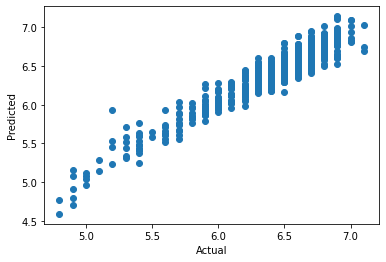

In [16]:
# Plot actual vs predicted
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

In [17]:
# Display a regression result using statsmodel
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     901.1
Date:                Sat, 12 Nov 2022   Prob (F-statistic):               0.00
Time:                        16:45:04   Log-Likelihood:                 2189.0
No. Observations:                3121   AIC:                            -4320.
Df Residuals:                    3092   BIC:                            -4145.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8315      0.199     19.262      0.0

In [18]:
# Get the coeffecients
importance = np.ravel(linreg.coef_)

Feature: 0, Score: 0.01166
Feature: 1, Score: -0.00133
Feature: 2, Score: -0.00035
Feature: 3, Score: 0.00797
Feature: 4, Score: -0.43861
Feature: 5, Score: 0.08686
Feature: 6, Score: 0.19796
Feature: 7, Score: 0.00730
Feature: 8, Score: -0.14661
Feature: 9, Score: 0.01230
Feature: 10, Score: -0.01658
Feature: 11, Score: 0.31251
Feature: 12, Score: 0.00000
Feature: 13, Score: -0.00000
Feature: 14, Score: -0.00116
Feature: 15, Score: -0.00051
Feature: 16, Score: 0.00043
Feature: 17, Score: -0.00125
Feature: 18, Score: -0.00129
Feature: 19, Score: -0.00717
Feature: 20, Score: 0.01295
Feature: 21, Score: 0.00348
Feature: 22, Score: 0.00470
Feature: 23, Score: 0.00353
Feature: 24, Score: 0.01545
Feature: 25, Score: -0.00642
Feature: 26, Score: 0.00002
Feature: 27, Score: -0.00430


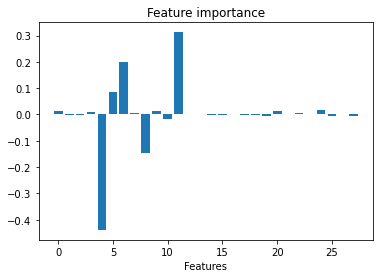

In [19]:
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.title("Feature importance")
plt.xlabel("Features")
plt.show()

[]

<Figure size 300x400 with 0 Axes>

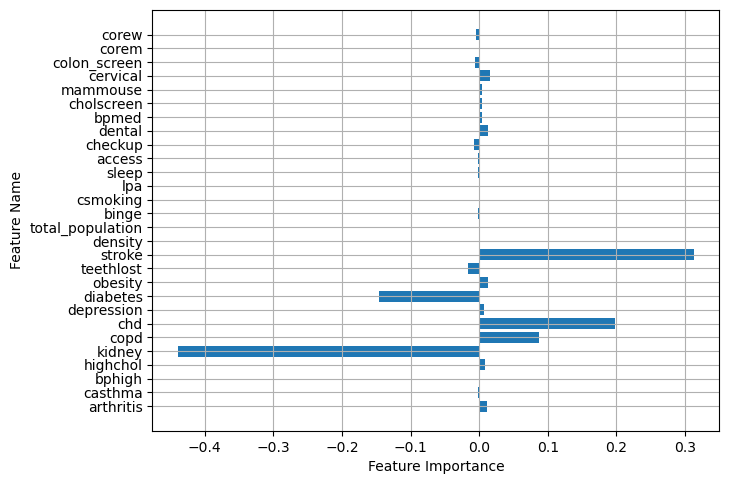

In [23]:
# Create a horizontal barchart of feature importances

#set labels and ticks
y_pos = np.arange(len(importance))
Y_labels = combined_data_df.drop("cancer", axis=1).columns

# Create the chart
plt.rcdefaults()
plt.figure(figsize=(3,4))
fig, ax = plt.subplots()
plt.tight_layout()
plt.grid(True)
ax.barh([x for x in range(len(importance))], importance, align='center', )
ax.set_yticks(y_pos, labels=Y_labels)
ax.set_xlabel('Feature Importance')
ax.set_ylabel('Feature Name')
plt.plot()

In [ ]:
# Generate predictions for all of the data
